In [1]:
import numpy as np
import xarray as xr
import cmaps #pip install https://github.com/hhuangwx/cmaps/archive/master.zip
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

import gdal
import rioxarray
import netCDF4
import salem


In [3]:
def adjust_colorbar(fig, ax, width=0.02, pad=0.02, shrink=1.0):
    """
    https://www.i-lightning.cn/2020/02/matplotlib_fix_colorbar/
    使用make_axes_locatable固定colorbar的axes之后，获取其坐标，然后清除相应的axe，使用add_axes创建新的坐标轴即可。
    """
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad="5%")

    fig.canvas.draw()
    pos = ax.get_position()
    ydf = (1-shrink)*(pos.ymax - pos.ymin)/2
    cax.remove()
    
    return fig.add_axes([pos.xmax+pad, pos.ymin+ydf, width, (pos.ymax-pos.ymin)-2*ydf])

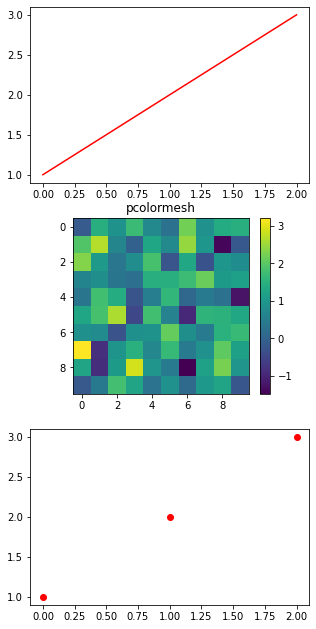

In [21]:
# plt.figure(num=1,figsize = (5,11)) # 创建一个画板（figure）


for index,ax in enumerate(axes.ravel()):
    if index == 0:
        ax.plot([1,2,3],'r-') 
    if index == 2:
        ax.plot([1,2,3],'ro')
    if index == 1:
        x = np.arange(10)
        y = np.arange(10)
        z = np.ones([10,10]) + np.random.randn(10,10)
        mm = ax.imshow(z)
        cbar_ax = adjust_colorbar(fig, ax, width=0.03, pad=0.03, shrink=1.0)
        fig.colorbar(mm, ax=ax, cax= cbar_ax)
        ax.set_title('pcolormesh')


# fig.subplots_adjust(right=0.6)
# fig.subplots_adjust(top=0.9)
#colorbar 左 下 宽 高 
# l = 0.92
# b = 0.12
# w = 0.015
# h = 1 - 2*b 
# rect = [l,b,w,h] 
# cbar_ax = fig.add_axes(rect) 
# fig.colorbar(mm, cax=cbar_ax) #

# fig.colorbar(mm, extend='both') 

In [ ]:
# # 添加本机的行政区划 SHP 底图
fname = './shapefile/lanxizhishui/cnhimap.shp'
china_shapes = list(shpreader.Reader(fname).geometries())

### 先调整出一个完备的单张图的

In [249]:
fig,axes = plt.subplots(1,1
                    ,num=666
                    ,figsize = (15,4.5)
                    ,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0, globe=None)
                                # ,'aspect': 'auto'
                                }
                    ,sharex=True
                    ,sharey=True
                    # ,clear=True
                    )

values = [value_a,value_b,value_c,value_c]
annotations = ['a','b','c','d']
subs = [[0.258, 0.288, 0.15, 0.15],[0.258*2+0.016, 0.288, 0.15, 0.15],[0.258*3+0.03, 0.288, 0.15, 0.15]]

# 若有多个行或列，将它变为一维
# 若为单个，将它放入数组中
if type(axes) == np.ndarray:
    axes_ = axes.ravel()
else:
    axes_ = np.array([axes])

for index,ax in enumerate(axes_):

    ax.add_geometries(china_shapes, ccrs.PlateCarree(),
                    edgecolor='#696969', facecolor='None', alpha=0.8)

    # if index == 0:
    #     pass

    cb = ax.pcolorfast(x, y, values[index],
                vmin=0,vmax=1,snap=True,
                transform=ccrs.PlateCarree(),cmap=cmaps.MPL_YlGnBu) 
    ax.annotate(annotations[index]
                ,(0.03,0.93)
                ,xycoords='axes fraction'
                ,fontsize=14
                # ,fontdict={'family':'DejaVu Sans'}
                )




    # grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
    #                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
    # grid.xlabels_top = False
    # grid.ylabels_right = False
    # grid.ylabels_bottom = False
    # grid.ylabels_left = False
    # grid.xlocator = mticker.FixedLocator([75,85,95,105,115,125,135])
    # grid.ylocator = mticker.FixedLocator([10,20,30,40,50,60])
    # grid.xformatter = LONGITUDE_FORMATTER
    # grid.yformatter = LATITUDE_FORMATTER
#     经纬度值细致调整版
    ax.set_xticks([75,85,95,105,115,125,135],crs=ccrs.PlateCarree())
    ax.set_yticks([20,30,40,50],crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='g',
                                       degree_symbol='°',
                                       dateline_direction_label=False)
    lat_formatter = LatitudeFormatter(number_format='g',
                                      degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # ax.coastlines(resolution = '110m')


    # ax.set_extent([73, 136, 17, 55], crs=ccrs.PlateCarree())
    # 想要share X/Y 必须用下面的方式
    ax.set_xlim([73, 136])
    ax.set_ylim([17, 55])
    # ax.set_adjustable('box-forced')

    # 子图的位置需要调整，建议单张出图，多张还是不要用这种方式
    sub_ax = fig.add_axes(subs[index],
                          projection=ccrs.PlateCarree(central_longitude=100.0, globe=None))
    sub_ax.add_geometries(china_shapes, ccrs.PlateCarree(),
                          edgecolor='#696969', facecolor='None', alpha=1)
    sub_ax.set_extent([105, 123, 1, 24])

    sub_ax.pcolorfast(x, y, values[index],vmin=0,vmax=1,transform=ccrs.PlateCarree(),
                       cmap=cmaps.MPL_YlGnBu) 





    axins = ax.inset_axes([0.85, 0.05, 0.1, 0.2])
    # axins = zoomed_inset_axes(ax, 0.8, loc = 3)
    axins.pcolorfast(x, y, values[index],vmin=0,vmax=1,
                       cmap=cmaps.MPL_YlGnBu) 
    # axins.add_geometries(china_shapes, 
    #                       edgecolor='#696969', facecolor='None', alpha=1)
    axins.set_xlim(111, 122)
    axins.set_ylim(10, 20)
    # ax.indicate_inset_zoom(axins)
    # axins = zoomed_inset_axes(axes, 0.8, loc = 4)
    mark_inset(ax, axins, loc1=2, loc2=4, fc = "none", ec = "none")

# plt.savefig('all.pdf')


# fig.colorbar(cb)
# fig.subplots_adjust(top = 0.9, bottom = 0.1, left = 0.12, right = 0.63,
#                        hspace = 0.05, wspace = 0.01)    
# leg = fig.colorbar(cb, ax= axes.ravel().tolist(), pad = 0.01)



AttributeError: 'GeoAxesSubplot' object has no attribute 'inset_geoaxes'

In [244]:
?ax

Type:            GeoAxesSubplot
String form:     < GeoAxes: <cartopy.crs.PlateCarree object at 0x000001EF07193D08> >
File:            d:\rdp\anaconda3\envs\heqin\lib\site-packages\cartopy\mpl\geoaxes.py
Docstring:       <no docstring>
Class docstring:
Base class for subplots, which are :class:`Axes` instances with
additional methods to facilitate generating and manipulating a set
of :class:`Axes` within a figure.
Init docstring: 
Parameters
----------
fig : `matplotlib.figure.Figure`

*args : tuple (*nrows*, *ncols*, *index*) or int
    The array of subplots in the figure has dimensions ``(nrows,
    ncols)``, and *index* is the index of the subplot being created.
    *index* starts at 1 in the upper left corner and increases to the
    right.

    If *nrows*, *ncols*, and *index* are all single digit numbers, then
    *args* can be passed as a single 3-digit number (e.g. 234 for
    (2, 3, 4)).


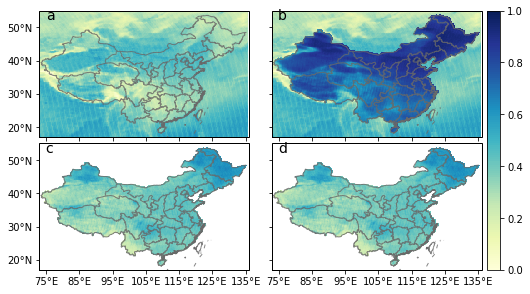

In [180]:
fig,axes = plt.subplots(2,2
                    ,num=666
                    ,figsize = (15,4.5)
                    ,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0, globe=None)
                                # ,'aspect': 'auto'
                                }
                    ,sharex=True
                    ,sharey=True
                    # ,clear=True
                    )

values = [value_a,value_b,value_c,value_c]
annotations = ['a','b','c','d']
subs = [[0.258, 0.288, 0.15, 0.15],[0.258*2+0.016, 0.288, 0.15, 0.15],[0.258*3+0.03, 0.288, 0.15, 0.15]]

# 若有多个行或列，将它变为一维
# 若为单个，将它放入数组中
if type(axes) == np.ndarray:
    axes_ = axes.ravel()
else:
    axes_ = np.array([axes])

for index,ax in enumerate(axes_):

    ax.add_geometries(china_shapes, ccrs.PlateCarree(),
                    edgecolor='#696969', facecolor='None', alpha=0.8)

    # if index == 0:
    #     pass

    cb = ax.pcolorfast(x, y, values[index],
                vmin=0,vmax=1,snap=True,
                transform=ccrs.PlateCarree(),cmap=cmaps.MPL_YlGnBu) 
    ax.annotate(annotations[index]
                ,(0.03,0.93)
                ,xycoords='axes fraction'
                ,fontsize=14
                # ,fontdict={'family':'DejaVu Sans'}
                )




    # grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
    #                 linewidth=1, color='gray', alpha=0.25, linestyle='--')
    # grid.xlabels_top = False
    # grid.ylabels_right = False
    # grid.ylabels_bottom = False
    # grid.ylabels_left = False
    # grid.xlocator = mticker.FixedLocator([75,85,95,105,115,125,135])
    # grid.ylocator = mticker.FixedLocator([10,20,30,40,50,60])
    # grid.xformatter = LONGITUDE_FORMATTER
    # grid.yformatter = LATITUDE_FORMATTER
#     经纬度值细致调整版
    ax.set_xticks([75,85,95,105,115,125,135],crs=ccrs.PlateCarree())
    ax.set_yticks([20,30,40,50],crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='g',
                                       degree_symbol='°',
                                       dateline_direction_label=False)
    lat_formatter = LatitudeFormatter(number_format='g',
                                      degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # ax.coastlines(resolution = '110m')


    # ax.set_extent([73, 136, 17, 55], crs=ccrs.PlateCarree())
    # 想要share X/Y 必须用下面的方式
    ax.set_xlim([73, 136])
    ax.set_ylim([17, 55])
    # ax.set_adjustable('box-forced')

    # 子图的位置需要调整，建议单张出图，而不要用这种方式
    # sub_ax = fig.add_axes(subs[index],
    #                       projection=ccrs.PlateCarree(central_longitude=100.0, globe=None))
    # sub_ax.add_geometries(china_shapes, ccrs.PlateCarree(),
    #                       edgecolor='#696969', facecolor='None', alpha=1)
    # sub_ax.set_extent([105, 123, 1, 24])

    # sub_ax.pcolorfast(x, y, values[index],vmin=0,vmax=1,transform=ccrs.PlateCarree(),
    #                    cmap=cmaps.MPL_YlGnBu) 


# fig.colorbar(cb)
fig.subplots_adjust(top = 0.9, bottom = 0.1, left = 0.12, right = 0.63,
                       hspace = 0.05, wspace = 0.01)    
leg = fig.colorbar(cb, ax= axes.ravel().tolist(), pad = 0.01)



In [177]:
?LongitudeFormatter

Init signature:
LongitudeFormatter(
    zero_direction_label=False,
    dateline_direction_label=False,
    degree_symbol='°',
    number_format='g',
    transform_precision=1e-08,
)
Docstring:      Tick formatter for a longitude axis.
Init docstring:
Create a formatter for longitude values.

The axis must be part of an axes defined on a rectangular
projection (e.g. Plate Carree, Mercator).

Parameters
----------
zero_direction_label: optional
    If *True* a direction label (E or W) will be drawn next to
    longitude labels with the value 0. If *False* then these
    labels will not be drawn. Defaults to *False* (no direction
    labels).
dateline_direction_label: optional
    If *True* a direction label (E or W) will be drawn next to
    longitude labels with the value 180. If *False* then these
    labels will not be drawn. Defaults to *False* (no direction
    labels).
degree_symbol: optional
    The symbol used to represent degrees. Defaults to u'°'
    which is the unicode degre

In [44]:
omi_vcd = xr.open_dataset('D:\RDP\Final\omi_qa4ecv_strict.nc')['tropospheric_NO2_column_number_density'][365:]
gome2b_vcd = xr.open_dataset('D:\RDP\Final\gome2b_china.nc')['tropospheric_NO2_column_number_density'][365:]
omi_count = xr.where(omi_vcd>0,1,0)
gome2b_count = xr.where(gome2b_vcd>0,1,0)

n = 0.25
x = np.arange (70,140+n,n)
y = np.arange (10,60+n,n)

value_a = omi_count.mean('time').values
vcd_count = omi_count+gome2b_count
vcd_count = xr.where(vcd_count>0,1,0) # 把加起来是2的地方换成1，2表示是gome和OMI共有
value_b = vcd_count.mean('time').values
value_c = value_b - value_a

value_a = np.where(value_a>0,value_a,np.nan)
value_b = np.where(value_b>0,value_b,np.nan)
value_c = np.where(value_c>0,value_c,np.nan)

In [ ]:
ax = plt.subplot(loc,projection=ccrs.PlateCarree(central_longitude=0, globe=None))
ax.set_extent([73, 136, 17, 55], crs=ccrs.PlateCarree())
ax.add_geometries(china_shapes, ccrs.PlateCarree(),
            edgecolor='#696969', facecolor='None', alpha=0.8)
cb = ax.pcolorfast(x, y, values,
            vmin=0,vmax=1,snap=True,
            transform=ccrs.PlateCarree(),cmap=cmaps.MPL_YlGnBu) 
#     cb = ax.imshow(values,extent=[x.min(),x.max(),y.min(),y.max()],interpolation='nearest',
#                          vmin=0,vmax=1,
#                          transform=ccrs.PlateCarree(),cmap=cmaps.MPL_YlGnBu) 
# pcolormesh 和 pcolor 导出来的 PDF 在 MAC 上会有网格的感觉

#     plt.colorbar(cb,orientation='vertical',shrink  = 0.6  )

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1, color='gray', alpha=0.25, linestyle='--')
grid.xlabels_top = False
grid.ylabels_right = False
grid.xlocator = mticker.FixedLocator([70,80,90,100,110, 120, 130,140])
grid.ylocator = mticker.FixedLocator([10,20,30,40,50,60])
grid.xformatter = LONGITUDE_FORMATTER
grid.yformatter = LATITUDE_FORMATTER

In [17]:
def manyPcolor(loc,values,annotation):
    ax = plt.subplot(loc,projection=ccrs.PlateCarree(central_longitude=0, globe=None))
    ax.set_extent([73, 136, 17, 55], crs=ccrs.PlateCarree())
    ax.add_geometries(china_shapes, ccrs.PlateCarree(),
                          edgecolor='#696969', facecolor='None', alpha=0.8)
    cb = ax.pcolorfast(x, y, values,
                         vmin=0,vmax=1,snap=True,
                         transform=ccrs.PlateCarree(),cmap=cmaps.MPL_YlGnBu) 
#     cb = ax.imshow(values,extent=[x.min(),x.max(),y.min(),y.max()],interpolation='nearest',
#                          vmin=0,vmax=1,
#                          transform=ccrs.PlateCarree(),cmap=cmaps.MPL_YlGnBu) 
    # pcolormesh 和 pcolor 导出来的 PDF 在 MAC 上会有网格的感觉
    
#     plt.colorbar(cb,orientation='vertical',shrink  = 0.6  )

    grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.25, linestyle='--')
    grid.xlabels_top = False
    grid.ylabels_right = False
    grid.xlocator = mticker.FixedLocator([70,80,90,100,110, 120, 130,140])
    grid.ylocator = mticker.FixedLocator([10,20,30,40,50,60])
    grid.xformatter = LONGITUDE_FORMATTER
    grid.yformatter = LATITUDE_FORMATTER



#     # 需要显示的经纬度值
#     ax.set_xticks([75,85,95,105,115,125,135],crs=ccrs.PlateCarree())
#     ax.set_yticks([20,30,40,50],crs=ccrs.PlateCarree())
#     lon_formatter = LongitudeFormatter(number_format='g',
#                                        degree_symbol='°',
#                                        dateline_direction_label=True)
#     lat_formatter = LatitudeFormatter(number_format='g',
#                                       degree_symbol='°')
#     ax.xaxis.set_major_formatter(lon_formatter)
#     ax.yaxis.set_major_formatter(lat_formatter)

    
    ax.annotate(annotation,(0.03,0.93),xycoords='axes fraction',fontsize=14)#,fontdict={'family':'DejaVu Sans'}
    
    return cb


def manyPcolorSub(locSub,values):
    sub_ax = fig.add_axes(locSub,
                          projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
    sub_ax.add_geometries(china_shapes, ccrs.PlateCarree(),
                          edgecolor='#696969', facecolor='None', alpha=1)
    sub_ax.set_extent([105, 123, 1, 24])

    sub_ax.pcolorfast(x, y, values,vmin=0,vmax=1,transform=ccrs.PlateCarree(),
                       cmap=cmaps.MPL_YlGnBu) 

    return sub_ax


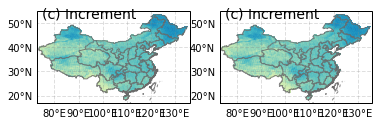

In [28]:

# manyPcolor(131,value_a,"(a) OMI")
# manyPcolor(132,value_b,"(b) Combined")
cb = manyPcolor(121,value_c,"(c) Increment")

cb = manyPcolor(122,value_c,"(c) Increment")

# manyPcolorSub([0.260, 0.254, 0.15, 0.15],value_a)
# manyPcolorSub([0.533, 0.254, 0.15, 0.15],value_b)
# manyPcolorSub([0.806, 0.254, 0.15, 0.15],value_c)

# fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.25, 0.01, 0.51])
plt.colorbar(cb,orientation='vertical',cax=cbar_ax)#,shrink = 0.6


plt.savefig('all.pdf')

plt.show()    

# 清除之前的图形
# plt.clf()

<Figure size 1440x374.4 with 0 Axes>

In [3]:
n = 0.25
x = np.arange (70,140+n,n)
y = np.arange (10,60+n,n)

In [4]:
import numpy as np
import xarray as xr
import cmaps #pip install https://github.com/hhuangwx/cmaps/archive/master.zip
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

import gdal
import rioxarray
import netCDF4
import salem

import geopandas
import rioxarray
from shapely.geometry import box, mapping

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader


ImportError: cannot import name 'buffer_to_virtual_file' from 'fiona.ogrext' (unknown location)

In [ ]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



In [2]:
import numpy as np
import xarray as xr
import cmaps #pip install https://github.com/hhuangwx/cmaps/archive/master.zip
import proplot as plot
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

In [5]:

fname = r'D:\RDP\Final\Draw\cnmapFROMlanxizhishui\cnhimap.shp' #含省
cnhimap = list(Reader(fname).geometries())

In [3]:
import geopandas

ImportError: DLL load failed: 找不到指定的模块。

In [1]:
f, axs = plot.subplots(
    ncols=2, nrows=2, axwidth=4,#figsize=(6,3),
    proj='pcarree')

# 选择 colormap
# cmap = 'roma_r'
cmap = cmaps.MPL_YlGnBu # cmaps 库里面的与 ncl 的一致
# cmap = plot.LinearSegmentedColormap.from_file('E:\\RDP备用包\\宁东制图\\ProplotExport1\\NO2&SO2\\tropomi.rgb') # 自定义的

for i, ax in enumerate(axs):
    ax.add_geometries(cnhimap,ccrs.PlateCarree(),\
                  edgecolor='grey',facecolor='None',alpha=0.7) 

    data_array = nc1.sel(time='2018-11-01')
    
    m = ax.pcolormesh(data_array, cmap=cmap 
                       ,globe=False, extend='max'
                       ,levels=np.linspace(0, 50E+15, 300))
    
    # m = ax.plot(x_array,y_array,'.',data=data_array)#vmin=-0.1,vmax=0.8
    # m=ax.scatter(x_array,y_array, c=data_array,cmap=cmap,vmin=0,vmax=20)




    # Create inset axes representing a "zoom-in"
    iax = ax.inset(
        [0.76, 0.03, 0.3, 0.3]
        , projection='pcarree'
        , zoom=False
        , zoom_kw={'color': 'red3', 'lw': 2, 'ls': '--'}
    )
    iax.format(
        lonlim=(105, 124), latlim=(2, 25)
        ,lonlines=10
        ,latlines=10
        # , color='red7',
        # linewidth=1.5, ticklabelweight='bold'
    )
    iax.add_geometries(cnhimap,ccrs.PlateCarree(),\
                    edgecolor='grey',facecolor='None',alpha=0.7)  
    iax.pcolormesh(data_array, cmap=cmap 
                        ,globe=False, extend='max'
                        ,levels=np.linspace(0, 50E+15, 300))




f.colorbar(m, label=r'$ Trop. NO_2\  VCDs\ (10^{15} molec.·cm^{-2})$'
        #    ,tickminor=False, extendsize='0.5em', space='1em'
        #    ,values=np.arange(0, 51E+15, 5E+15)
        )# loc='b',span=i+1,label='values',






axs.format(
#     suptitle=year_str
#   , collabels=['Terra','Aqua','Merged']
#   , rowlabels=['Contourf'],
      lonlim=(73, 135.4)
    , latlim=(17.2,54.2)
    , lonlines=10
    , latlines=plot.arange(10, 60, 10)
    , latlabels='l'
    , lonlabels='b'
    # , abc=True
    # , abcstyle='a)'
    # , abcloc='ul'
    # , abcborder=False
)
# f.savefig('test.png',dpi=1000)

NameError: name 'plot' is not defined